## Image Processing

In this notebook we will cover tranformation with openCV. It will cover translations, rotations, resizing, flipping, cropping etc. We will cover basic image processing like image arithmetic, bit operations and masking.

### Translations

In [2]:
import numpy as np
import cv2 as cv2


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


OpenCV represents RGB images as multi-dimensional NumPy arrays, but the order is reversed.
This means that images are actually represented in BGR order rather than RGB.
The function below can fix it.

In [3]:
#Routine to fix 
def fixColor(image):
    return(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [4]:
image=cv2.imread("images/giraffe.jpg")

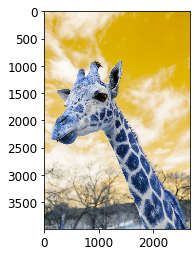

In [5]:
plt.imshow(image)

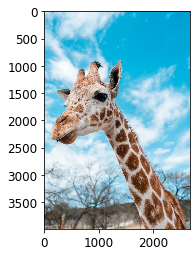

In [6]:
#Note the impact of the correct color scheme
plt.imshow(fixColor(image))

In [7]:
#Translation matrix the first row moves pixels horizontally and the second row moves in vertically.
M = np.float32([[1, 0, 250], [0, 1, 500]])

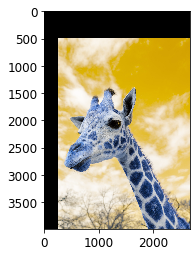

In [8]:
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape
[0]))
plt.imshow(shifted)

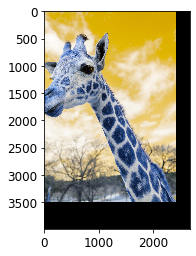

In [9]:
#Changed the pixel directions to move image left and up
M = np.float32([[1, 0, -250], [0, 1, -500]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape
[0]))
plt.imshow(shifted)

Images can be rotated also. The translation matrix has to be specified accordingly

In [10]:
(height, width, channels) = image.shape
centre=(width//2, height//2)

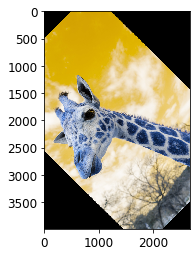

In [11]:
M = cv2.getRotationMatrix2D(centre, 45, 1.0)
rotated = cv2.warpAffine(image, M, (width, height))
plt.imshow(rotated)

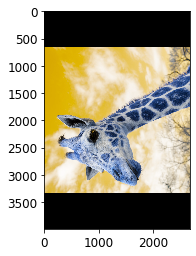

In [12]:
M = cv2.getRotationMatrix2D(centre, 90, 1.0)
rotated = cv2.warpAffine(image, M, (width, height))
plt.imshow(rotated)

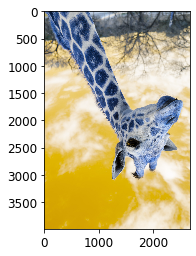

In [13]:
M = cv2.getRotationMatrix2D(centre, 180, 1.0)
rotated = cv2.warpAffine(image, M, (width, height))
plt.imshow(rotated)

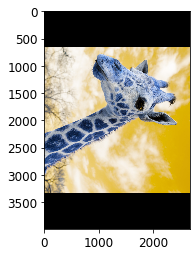

In [14]:
M = cv2.getRotationMatrix2D(centre, -90, 1.0)
rotated = cv2.warpAffine(image, M, (width, height))
plt.imshow(rotated)

### Resizing

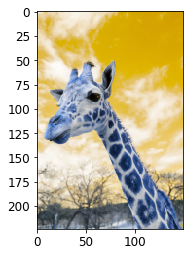

In [15]:
#Here we rezise setting width to 150 and scale the height accordingly
r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized)

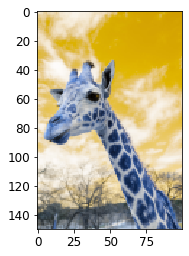

In [16]:
#Here we rezise setting height to 150 and scale the width accordingly
r = 150.0 / image.shape[0]
dim = ( int(image.shape[1] * r), 150)
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized)

In [17]:
cv2.imwrite('giraffe_resize.png', image)

True

### Flipping

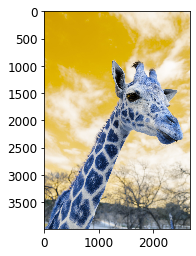

In [18]:
#Flipping acros y-axis
flipped = cv2.flip(image, 1)
plt.imshow(flipped)

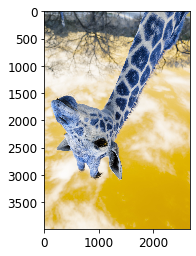

In [19]:
#flipping along x-axis
flipped = cv2.flip(image, 0)
plt.imshow(flipped)

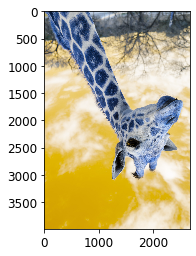

In [20]:
#flipping along x and y axes
flipped = cv2.flip(image, -1)
plt.imshow(flipped)

### Cropping

We will now see an example of cropping the image to get the head of the giraffe only

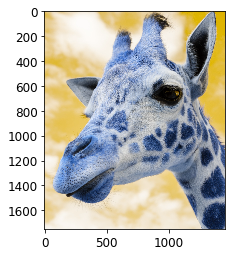

In [21]:
cropped_image=image[900:2650, 50:1500]
plt.imshow(cropped_image)

## Image Arithmetic

Pixels cannot have a higher value than 255 and value lower than 0. When an arithmetic operation like addition or subtraction causes the number to increase, the number is either clipped or wrapped around. Clipping means all numbers greater than a threshold will be clipped to the threshold. Wrapping around means, that after the threshold the next number will be 0.

Numpy performs wrap-around and OpenCV clips.

In [22]:
print("max of 255: {}".format(cv2.add(np.uint8([200]), np.uint8
([100]))))
print("min of 0: {}".format(cv2.subtract(np.uint8([50]), np.uint8
([100]))))

max of 255: [[255]]
min of 0: [[0]]


In [23]:
print("wrap around: {}".format(np.uint8([200]) + np.uint8([100])))
print("wrap around: {}".format(np.uint8([50]) - np.uint8([100])))

wrap around: [44]
wrap around: [206]


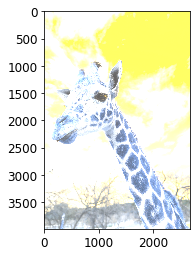

In [24]:
import numpy as np
import cv2 as cv2
#CV2 addition causes images to look whiter
image=cv2.imread("images/giraffe.jpg")
M = np.ones(image.shape, dtype = "uint8") * 100
added = cv2.add(image, M)
plt.imshow(added)

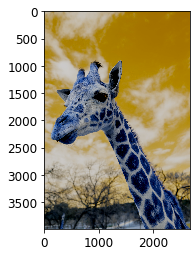

In [25]:
#Subtraction will make the image blacker
M = np.ones(image.shape, dtype = "uint8") * 50
subtracted = cv2.subtract(image, M)
plt.imshow(subtracted)

### Bit operations

Bit operations are a precursor to masks which are useful image processing. Bit operations are AND, OR, XOR and NOT.
They are similar to bit operations.

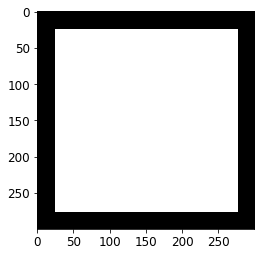

In [26]:
#Creating a square
square = np.zeros((300, 300), dtype = "uint8")
cv2.rectangle(square, (25, 25), (275, 275), 255, -1)
plt.imshow(fixColor(square))

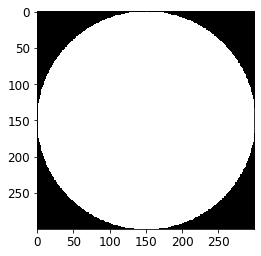

In [27]:
#Creating a circle
circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
plt.imshow(fixColor(circle))

Bit operations with square and circles

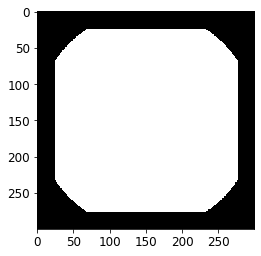

In [28]:
bitwiseAnd = cv2.bitwise_and(square, circle)
plt.imshow(fixColor(bitwiseAnd))

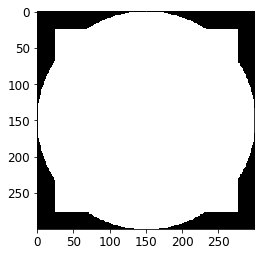

In [29]:
bitwiseOr = cv2.bitwise_or(square, circle)
plt.imshow(fixColor(bitwiseOr))

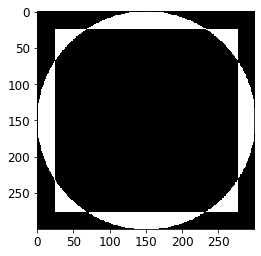

In [30]:
bitwiseXor = cv2.bitwise_xor(square, circle)
plt.imshow(bitwiseXor)
plt.imshow(cv2.cvtColor(bitwiseXor, cv2.COLOR_BGR2RGB))

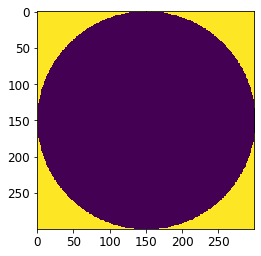

In [31]:
bitwiseNot = cv2.bitwise_not(circle)
plt.imshow(bitwiseNot)

### Masking

Using a mask allows us to focus only on the portions of the image that interests us.

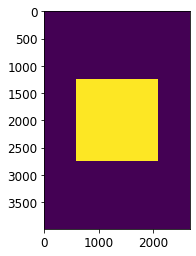

In [32]:
image=cv2.imread("images/giraffe.jpg")

#Create a mask which is captures a 1500 pixel square from the centre of the image

#First step is initialisation of an array of the same size of the picture
mask = np.zeros(image.shape[:2], dtype = "uint8")
#Identifying the center of the image
(cX, cY) = (image.shape[1] // 2, image.shape[0] // 2)
#Create the mask
cv2.rectangle(mask, (cX - 750, cY - 750), (cX + 750 , cY + 750), 255, -1)
plt.imshow(mask)


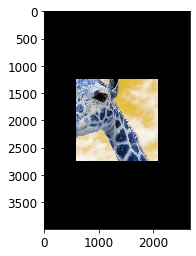

In [33]:
#Applying the mask and seeing the result
masked = cv2.bitwise_and(image, image, mask = mask)
plt.imshow(masked)

## Color Channels

A color image consists of multiple channels: a Red, a Green, and a Blue component. We have seen that we can access these components via indexing into NumPy arrays. 

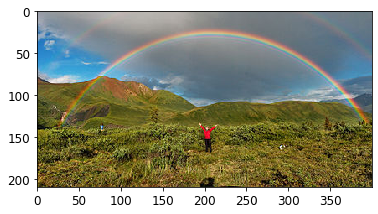

In [34]:
image=cv2.imread("images/rainbow.jpg")
plt.imshow(fixColor(image))

In [35]:
#splitting and displaying individual channels
(B, G, R) = cv2.split(image)

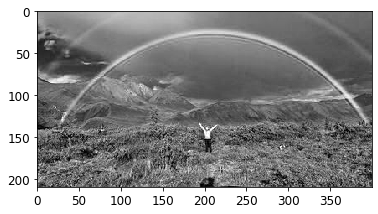

In [36]:
plt.imshow( fixColor(R))

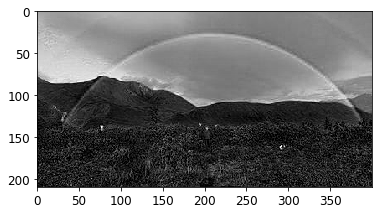

In [37]:
plt.imshow(fixColor(B))

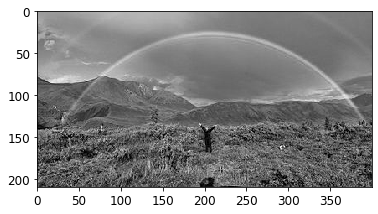

In [38]:
plt.imshow(fixColor(G))

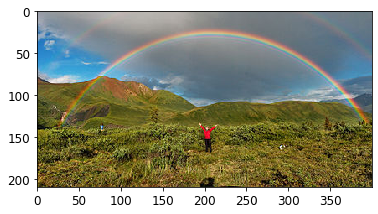

In [39]:
#Merging to display the full picture
merged = cv2.merge([B, G, R])
plt.imshow(fixColor(merged))

## Color Spaces

We have seen RGB color space. There are other color spaces which are interest Hue-Saturation-Value, L-a-b, L-u-v. For certain computer vision tasks it is better to operate in a different color space. OpenCV provides these translation capabilties.

In [40]:
image=cv2.imread("images/rainbow.jpg")

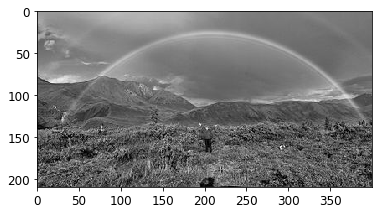

In [41]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(fixColor(gray))

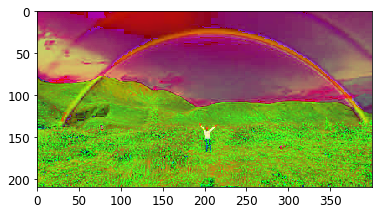

In [42]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(fixColor(hsv))

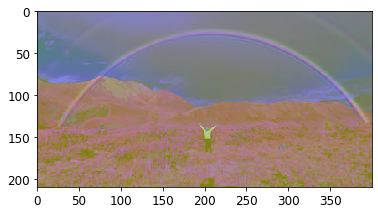

In [43]:
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
plt.imshow(fixColor(lab))

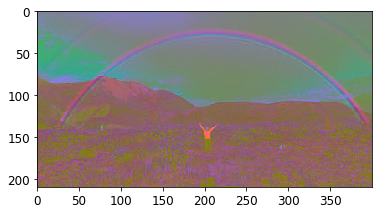

In [44]:
yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
plt.imshow(fixColor(yuv))